In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Carseats.csv")

Dasatet information 

* Sales : Target Variable
Unit sales (in thousands) at each location

* CompPrice : 
Price charged by competitor at each location

* Income : 
Community income level (in thousands of dollars)

* Advertising : 
Local advertising budget for company at each location (in thousands of dollars)

* Population : 
Population size in region (in thousands)

* Price : 
Price company charges for car seats at each site

* ShelveLoc : 
A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* Age : 
Average age of the local population

* Education : 
Education level at each location

* Urban : 
A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* US : 
A factor with levels No and Yes to indicate whether the store is in the US or not

In [30]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# 1. EDA

In [28]:
data.info() #no null values in variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [29]:
data.describe() #checking distribution for later analysis and predictive model

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>, <Axes: >]], dtype=object)

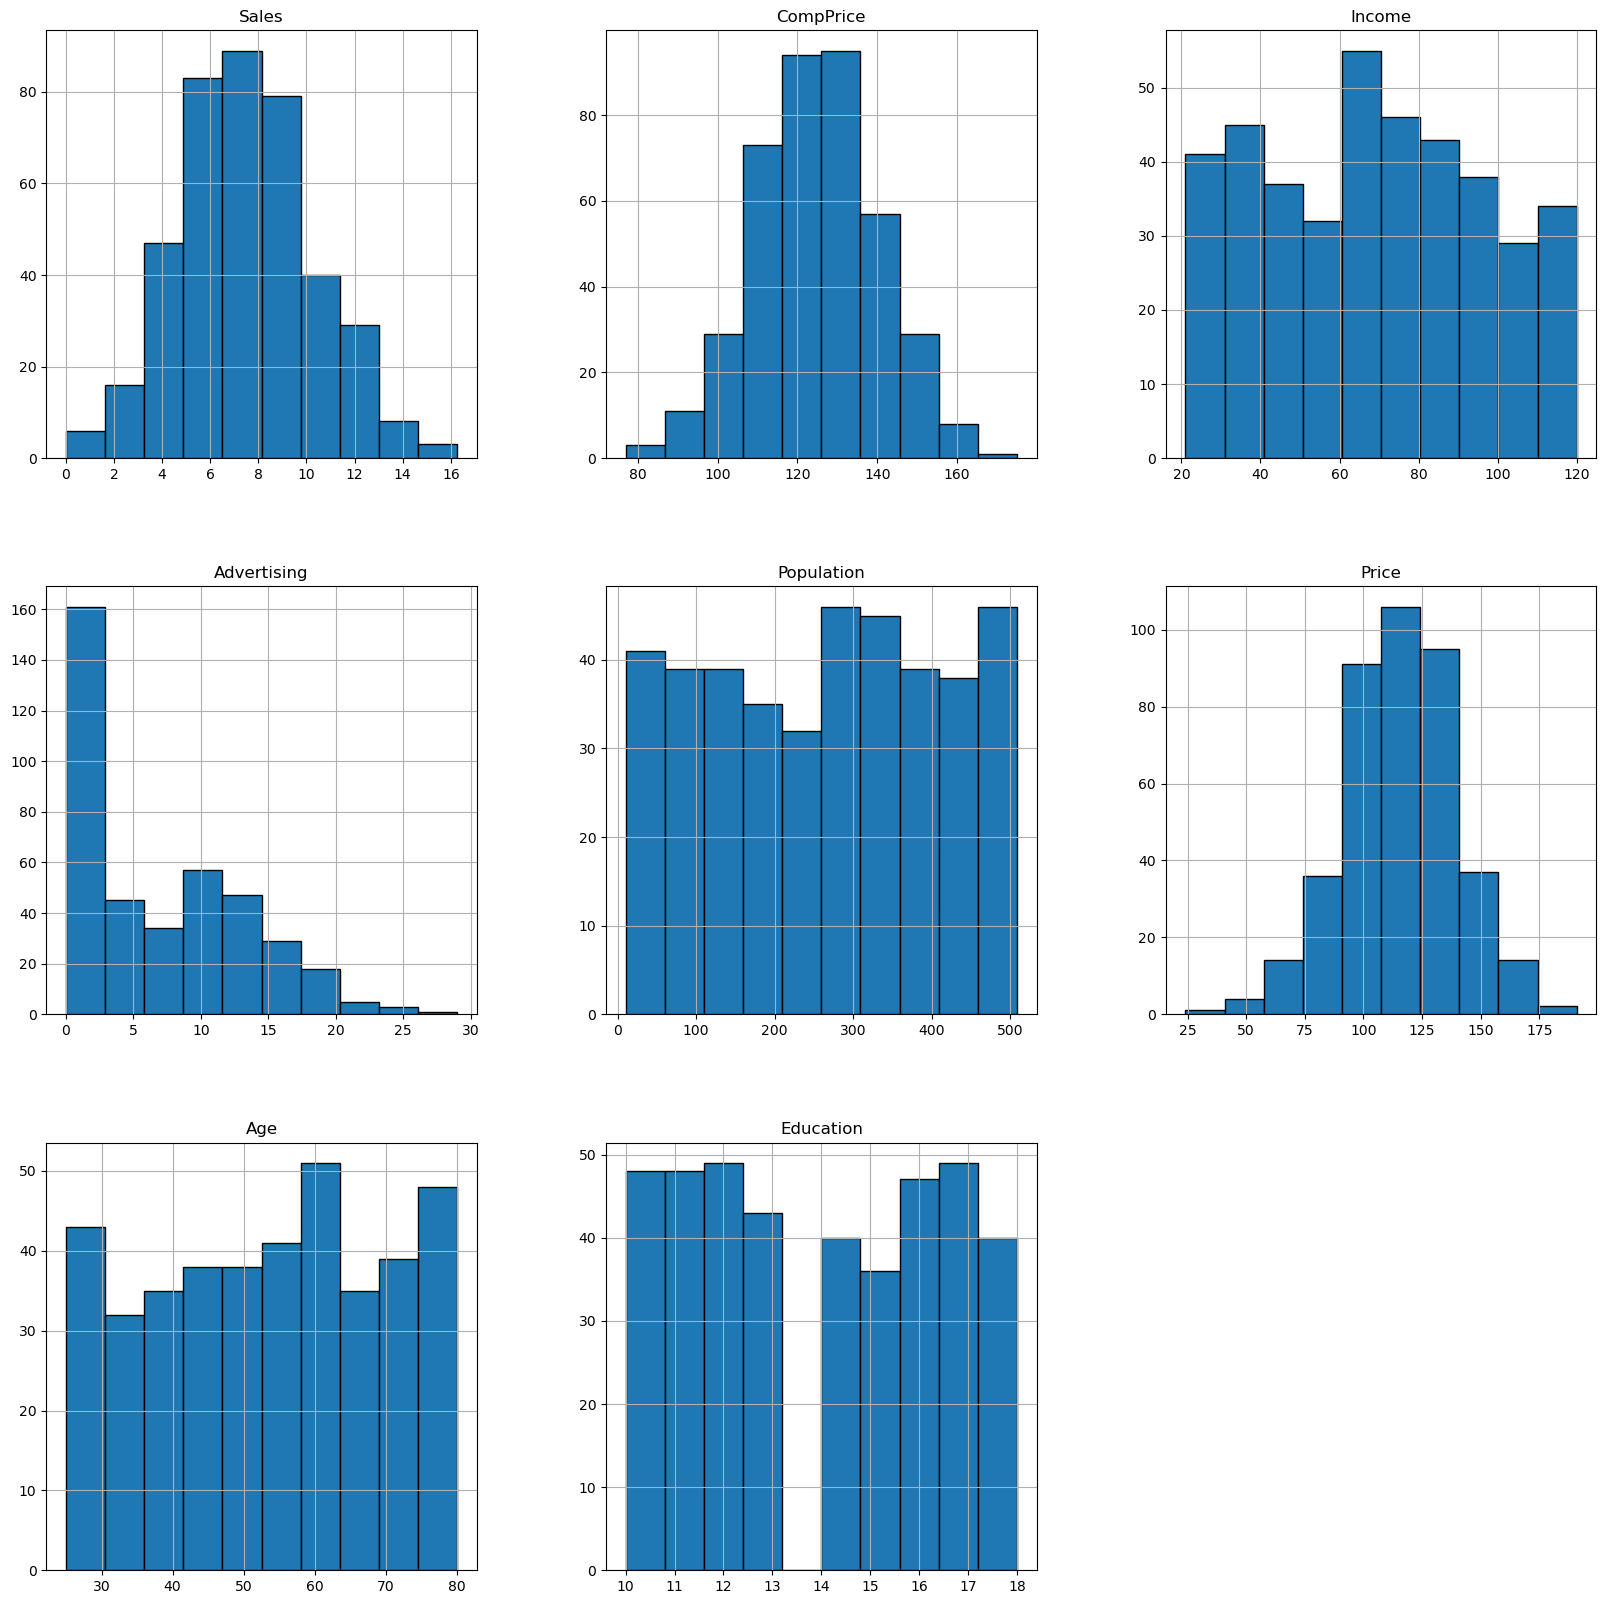

In [34]:
data.hist(edgecolor='black', linewidth=1, figsize=(20, 20)) #viasually the distributions of numeric variables

Most have litte advertising put into them. 

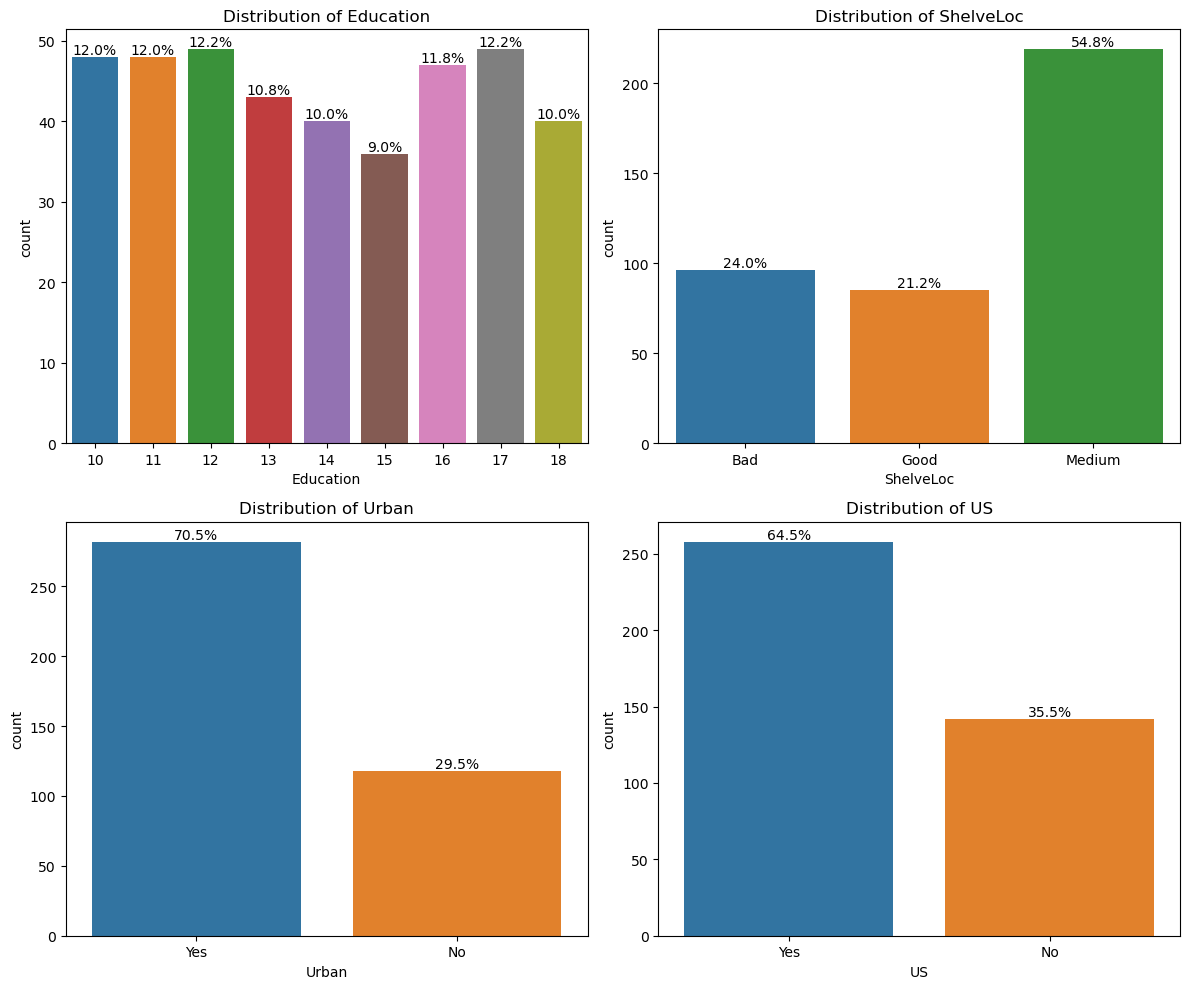

In [51]:
#Now we will analyze categorical variables and see their distribution among groups to analyze potential segmentations
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=data, palette='colorblind')
    plt.title(f'Distribution of {col}')
    
    # Percentage labels on the bars to have apart from count
    total = len(data[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{height / total * 100:.1f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

We can look at whether we all US stores sales are higher than non, as well as the urban factor affects it.

In [9]:
data.groupby(["US","Urban"])["Sales"].agg(["mean","sum"]) # highest sales on US Urban stores, tho US non Urban have the highest mean, I would like to check if the trend is recent but is not time-series data so we cant analyze that

mean      sum
US  Urban                   
No  No     6.458261   297.08
    Yes    6.997812   671.79
Yes No     8.269722   595.42
    Yes    7.710968  1434.24

KeyError: 'index'

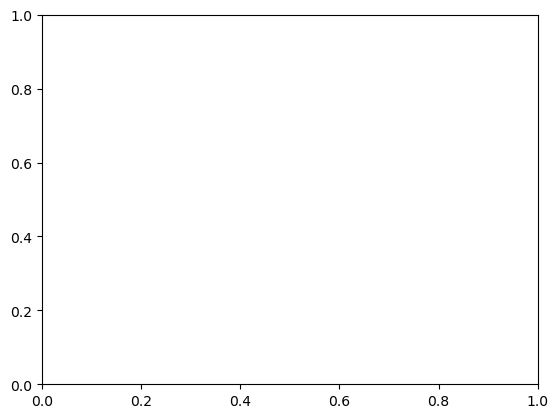

In [11]:
# visually scatter on this matter

data.plot(kind="scatter",x="Sales",y="index")

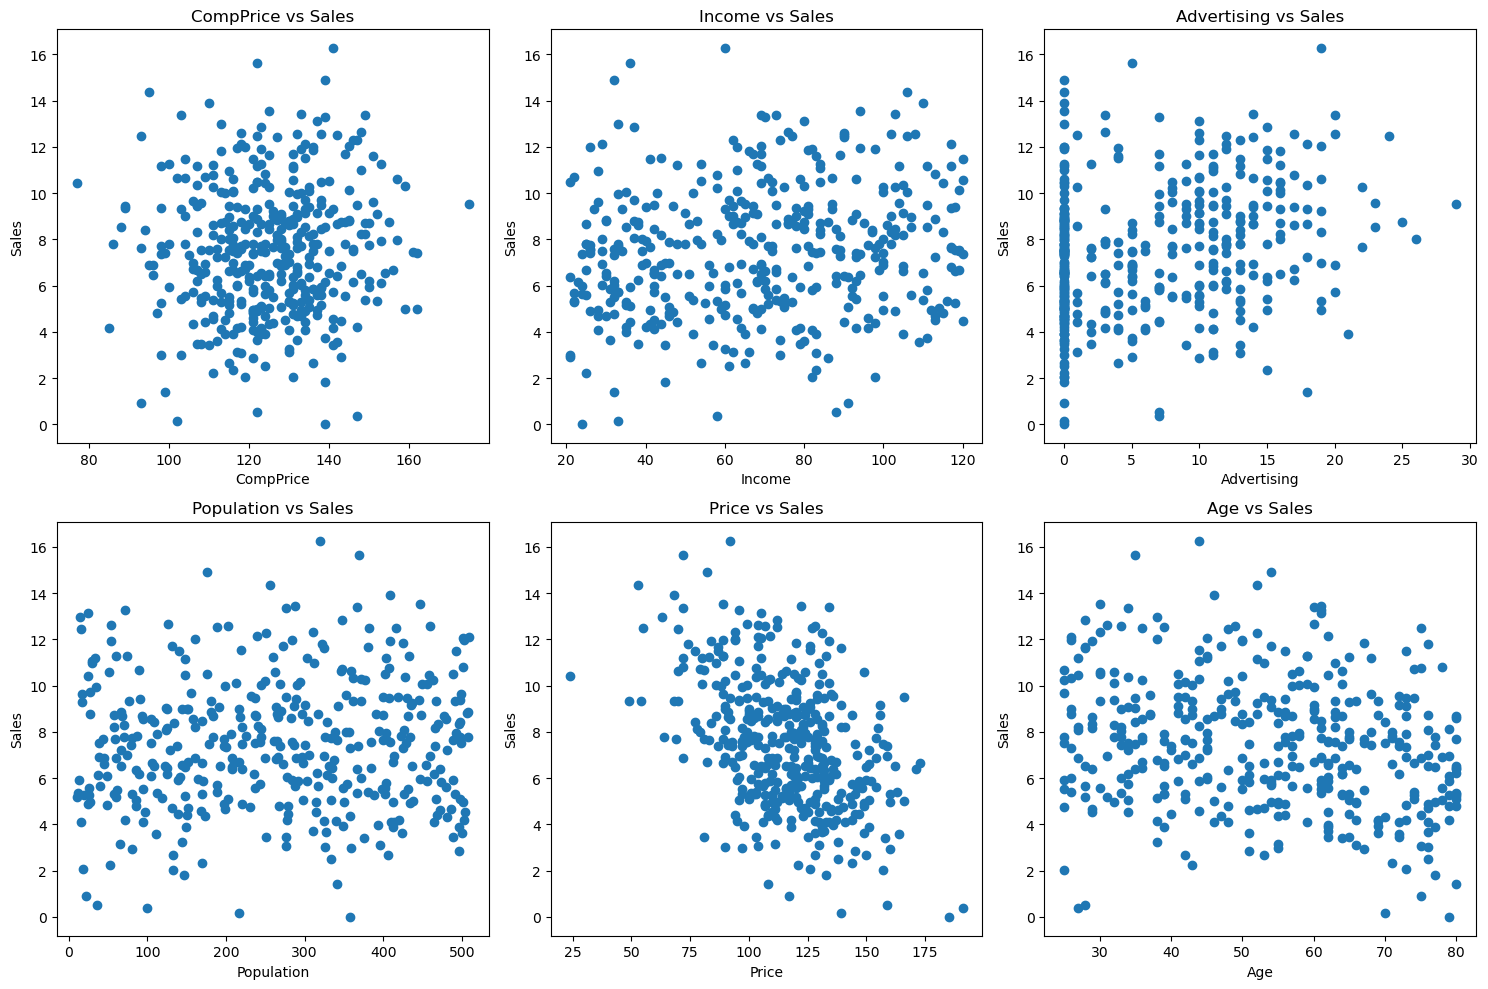

In [58]:
cont_cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Plotting scatter plots
for i, col in enumerate(cont_cols):
    axes[i].scatter(x=col, y='Sales', data=data)
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel('Sales')
    axes[i].set_title(f"{col} vs Sales")

plt.tight_layout()
plt.show()

In [61]:
data['PriceDiff'] = data['Price'] - data['CompPrice']
corr_df = data[['Sales', 'PriceDiff']]
corr_df.corr()

,Sales,PriceDiff
Sales,1.000000,-0.597922
PriceDiff,-0.597922,1.000000


In [62]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PriceDiff
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,-18
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,-28
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,-33
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,-20
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,-13
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,-10
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,-19
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,-3
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,-5


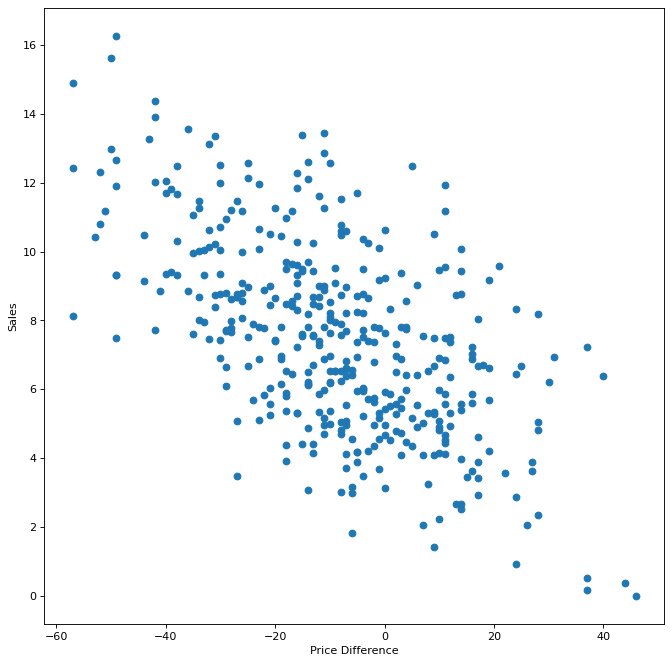

In [64]:
plt.figure(figsize=(10,10), dpi= 80)
plt.scatter(x='PriceDiff', y='Sales', data=data)
plt.xlabel('Price Difference')
plt.ylabel('Sales')
plt.show()

In [67]:
X = data.drop(['Sales', 'Price', 'CompPrice'], axis=1)
y = data['Sales']

X = pd.get_dummies(X)
X.head()

,Income,Advertising,Population,Age,Education,PriceDiff,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,73,11,276,42,17,-18,1,0,0,0,1,0,1
1,48,16,260,65,10,-28,0,1,0,0,1,0,1
2,35,10,269,59,12,-33,0,0,1,0,1,0,1
3,100,4,466,55,14,-20,0,0,1,0,1,0,1
4,64,3,340,38,13,-13,1,0,0,0,1,1,0


# 2. Multiple Regression

 Ver influencia cambio 1% en precio / advertising 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train features shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test features shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Train features shape: (280, 13)
Train labels shape: (280,)
Test features shape: (120, 13)
Test labels shape: (120,)


In [71]:
#3.1.2 Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg_dt= DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=2, max_depth=3, random_state=42)
reg_dt.fit(X_train, y_train)

pred = reg_dt.predict(X_test)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print(f"MSE : {MSE}, RMSE : {RMSE}")

MSE : 3.5223878070564263, RMSE : 1.8768025487664988


In [106]:
correlation_matrix = data.corr()

# Print the correlation of each feature with the target variable 'Sales'
target_correlation = correlation_matrix['Sales'].abs().sort_values(ascending=False)
print("\nCorrelation with Sales:")
print(target_correlation)

# Print selected features based on a threshold (e.g., 0.1)
selected_features = target_correlation[target_correlation > 0.1].index
print("\nSelected Features:")
print(selected_features)



Correlation with Sales:
Sales          1.000000
PriceDiff      0.597922
Price          0.444951
Advertising    0.269507
Age            0.231815
Income         0.151951
CompPrice      0.064079
Education      0.051955
Population     0.050471
Name: Sales, dtype: float64

Selected Features:
Index(['Sales', 'PriceDiff', 'Price', 'Advertising', 'Age', 'Income'], dtype='object')


/var/folders/c6/g4rnwdk54nggj6tzn70bc9v80000gn/T/ipykernel_22837/3664807589.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


/var/folders/c6/g4rnwdk54nggj6tzn70bc9v80000gn/T/ipykernel_22837/687797177.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


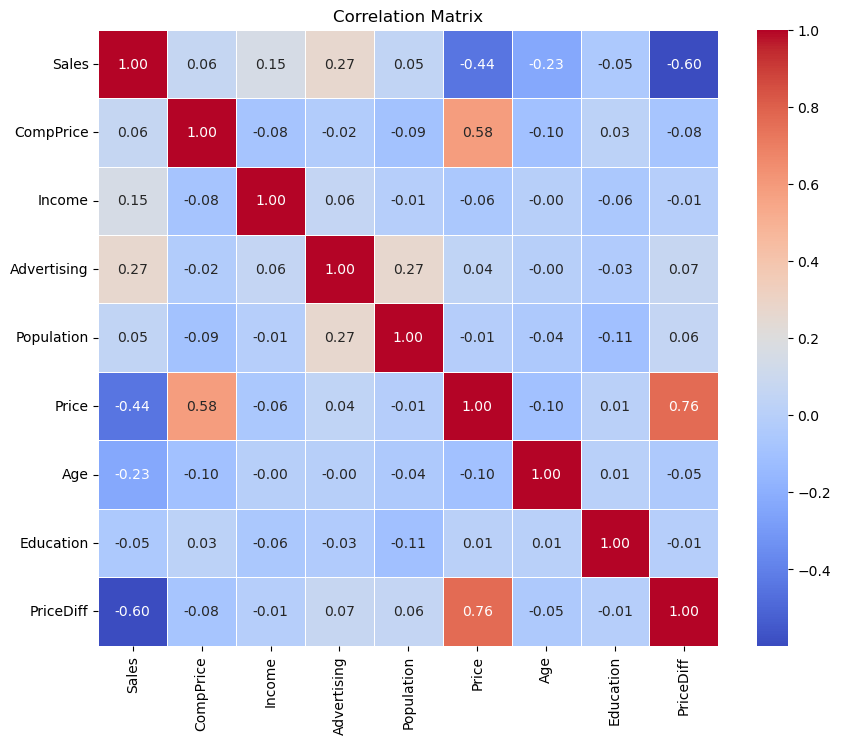

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataframe
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming 'Sales' is your target variable, and 'data' is your dataframe with features
X = data.drop('Sales', axis=1)  # Features
y = data['Sales']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Label encode categorical columns
label_encoder = LabelEncoder()
X_label_encoded = X.copy()
for col in categorical_columns:
    X_label_encoded[col] = label_encoder.fit_transform(X[col])

# One-hot encode categorical columns
X_onehot_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Display the label-encoded and one-hot encoded dataframes
print("Label Encoded Data:")
print(X_label_encoded.head())

print("\nOne-Hot Encoded Data:")
print(X_onehot_encoded.head())



Label Encoded Data:
   CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  PriceDiff  
0         17      1   1        -18  
1         10      1   1        -28  
2         12      1   1        -33  
3         14      1   1        -20  
4         13      1   0        -13  

One-Hot Encoded Data:
   CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117  

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'Sales' is your target variable, and 'data' is your dataframe with features
X = data.drop('Sales', axis=1)  # Features
y = data['Sales']  # Target variable

# Label encode categorical columns
label_encoder = LabelEncoder()
X_label_encoded = X.copy()
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_label_encoded[col] = label_encoder.fit_transform(X[col])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_label_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
print(f'Mean Squared Error (Validation Set): {mse_val}')

# Make predictions on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Test Set): {mse_test}')


Mean Squared Error (Validation Set): 1.783822512666666
Mean Squared Error (Test Set): 2.3247967046666655


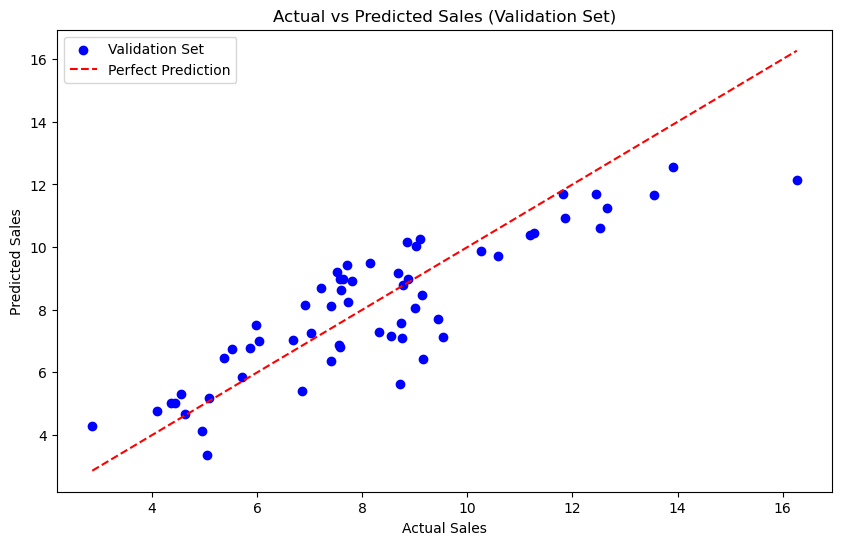

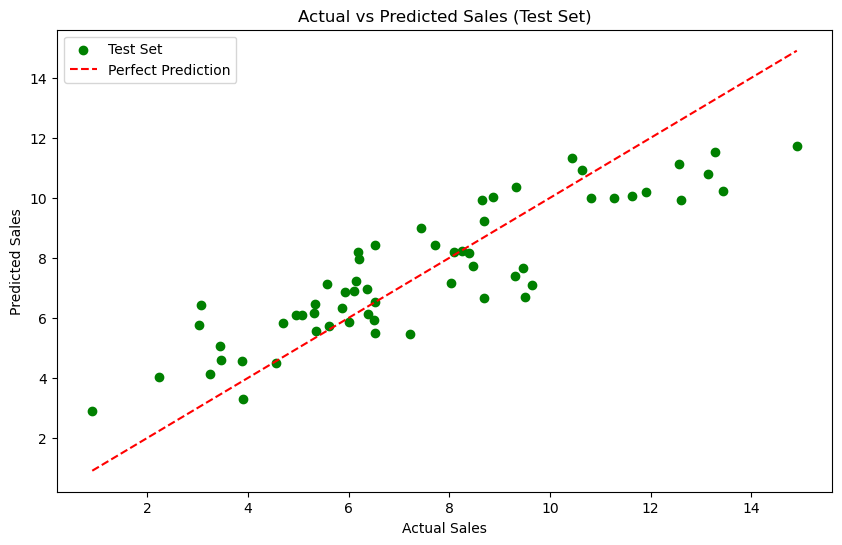

In [111]:
import matplotlib.pyplot as plt

# Scatter plot for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, color='blue', label='Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Sales (Validation Set)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

# Scatter plot for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Test Set')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()


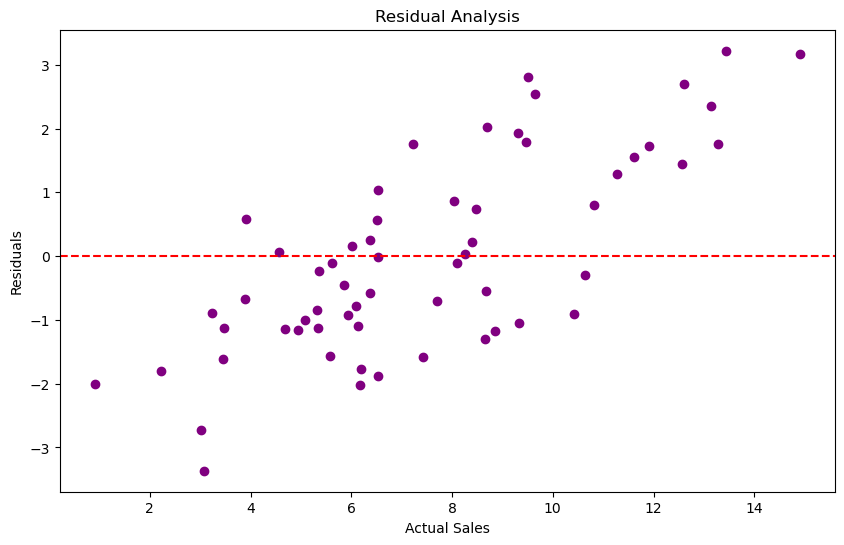

In [112]:
# Residual analysis
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='purple')
plt.title('Residual Analysis')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
